In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
training_set = pd.read_csv("train.csv")

In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

Text(0.5, 1.0, 'Liveness')

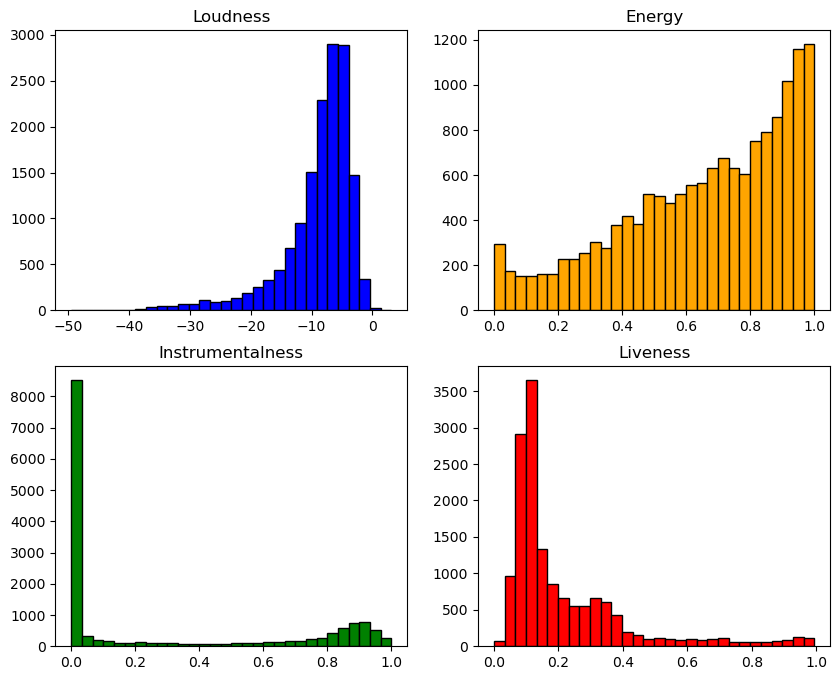

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].hist(training_set['loudness'], bins=30, color='blue', edgecolor='black')
axs[0, 0].set_title('Loudness')

# Plot 2
axs[0, 1].hist(training_set['energy'], bins=30, color='orange', edgecolor='black')
axs[0, 1].set_title('Energy')

# Plot 3
axs[1, 0].hist(training_set['instrumentalness'], bins=30, color='green', edgecolor='black')
axs[1, 0].set_title('Instrumentalness')

# Plot 4
axs[1, 1].hist(training_set['liveness'], bins=30, color='red', edgecolor='black')
axs[1, 1].set_title('Liveness')

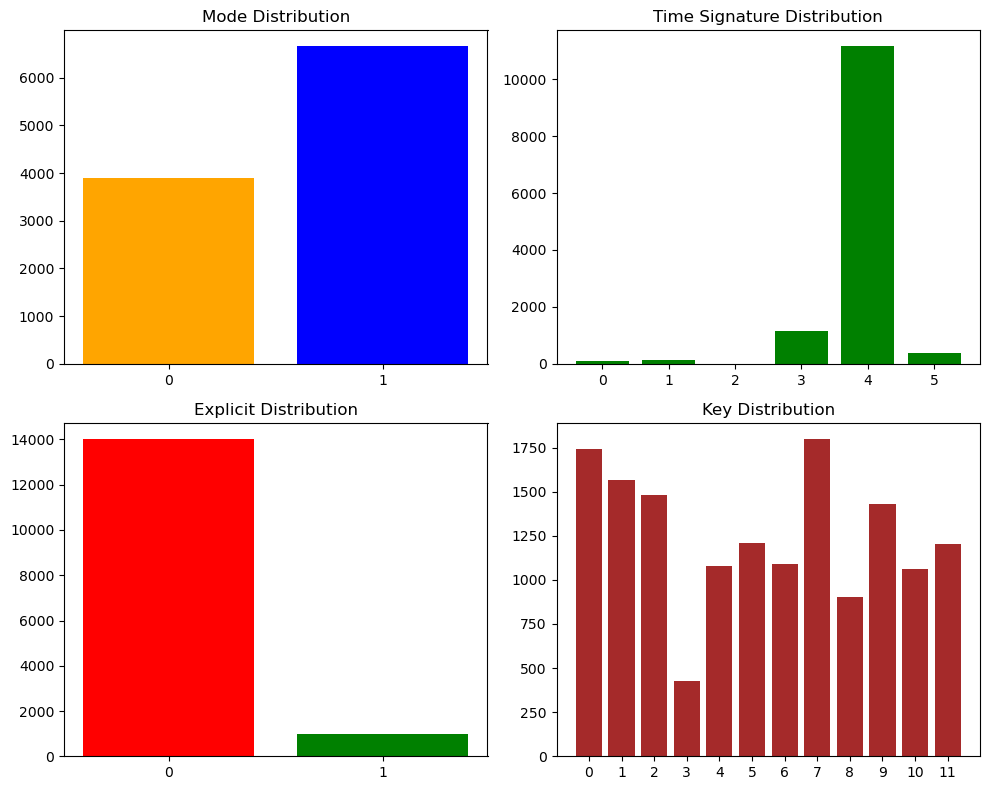

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Bar chart for 'mode'
mode_counts = training_set['mode'].value_counts()
axs[0, 0].bar(mode_counts.index, mode_counts.values, color=['blue', 'orange'])
axs[0, 0].set_title('Mode Distribution')
axs[0, 0].set_xticks([0, 1])

# Bar chart for 'time_signature'
time_signature_counts = training_set['time_signature'].value_counts()
axs[0, 1].bar(time_signature_counts.index, time_signature_counts.values, color='green')
axs[0, 1].set_title('Time Signature Distribution')

# Bar chart for 'explicit'
explicit_counts = training_set['explicit'].value_counts()
axs[1, 0].bar(explicit_counts.index, explicit_counts.values, color=['red', 'green'])
axs[1, 0].set_title('Explicit Distribution')
axs[1, 0].set_xticks([0, 1])

# Bar chart for 'key'
key_counts = training_set['key'].value_counts()
axs[1, 1].bar(key_counts.index, key_counts.values, color='brown')
axs[1, 1].set_title('Key Distribution')
axs[1, 1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
training_set = training_set.drop('popularity_confidence', axis = 1)

In [10]:
training_set['time_signature'] = training_set['time_signature'].fillna(training_set['time_signature'].mode().iloc[0])

In [11]:
# crea un df con due colonne genre e n. di missing values per ogni genre, ed aggiunge l'indice alle righe
missing_counts = training_set.groupby('genre')['mode'].apply(lambda x: x.isnull().sum()).reset_index()

# rinomino le colonne del df missing_counts, che orasi chiameranno genre e missing_count invece che genre e mode
missing_counts.columns = ['genre', 'missing_count']

# Crea il DataFrame df1 privo di missing values
df1 = training_set[training_set['mode'].notnull()]

# Calcola le frequenze di 0 e 1 per ciascun genere in df1
# frequencies_by_genre è un df che contiene le frequenze di 0 e 1 per ciascun genere
frequencies_by_genre = df1.groupby('genre')['mode'].value_counts(normalize=True).unstack().fillna(0)

# Sostituisci i missing values con liste di 0 e 1 basate sulle frequenze per ogni genere
for genre in training_set['genre'].unique():
    # restituisce True se c'è un missing value in mode e se è il genere in questione
    missing_values = training_set['mode'].isnull() & (training_set['genre'] == genre)
    # seleziona la giusta riga e colonna del df missing_counts e restituisce il conteggio di missing values per quel genre
    missing_count = missing_counts[missing_counts['genre'] == genre]['missing_count'].values[0]

    if missing_count > 0:
        # retituisce la coppia di frequenze per i valori 0 e 1 per il genre in questione
        frequencies = frequencies_by_genre.loc[genre]
        # crea un array di 0 e 1 estratti in base alle frequenze del genere, utilizzate come probabilità
        replacement_values = np.random.choice([0, 1], size=missing_count, p=frequencies)
        # sostituisce i missing values (True) della colonna mode con i valori dell'array precedente
        training_set.loc[missing_values, 'mode'] = replacement_values

In [12]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  15000 non-null  object 
 1   duration_ms           15000 non-null  int64  
 2   explicit              15000 non-null  bool   
 3   popularity            15000 non-null  int64  
 4   artists               15000 non-null  object 
 5   album_name            15000 non-null  object 
 6   danceability          15000 non-null  float64
 7   energy                15000 non-null  float64
 8   key                   15000 non-null  int64  
 9   loudness              15000 non-null  float64
 10  mode                  15000 non-null  float64
 11  speechiness           15000 non-null  float64
 12  acousticness          15000 non-null  float64
 13  instrumentalness      15000 non-null  float64
 14  liveness              15000 non-null  float64
 15  valence            

In [ ]:
variables_to_plot = ['speechiness','liveness']

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create box plots for each variable
plt.figure(figsize=(7, 7))
sns.boxplot(data=training_set[variables_to_plot], orient="v", palette="Set3")

In [ ]:
variables_to_plot = ['n_bars','n_beats']

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create box plots for each variable
plt.figure(figsize=(7, 7))
sns.boxplot(data=training_set[variables_to_plot], orient="v", palette="Set3")

In [ ]:
variables_to_plot = ['loudness']

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create box plots for each variable
plt.figure(figsize=(7, 7))
sns.boxplot(data=training_set[variables_to_plot], orient="v", palette="Set3")

Text(0.5, 1.0, 'Loudness')

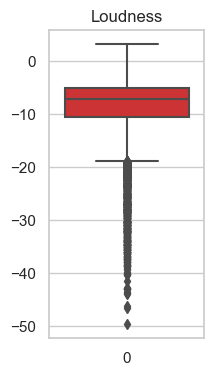

In [38]:
plt.figure(figsize=(2, 4))
sns.boxplot(data=training_set['loudness'], palette="Set1")
plt.title("Loudness")

Text(0.5, 1.0, 'n_bars')

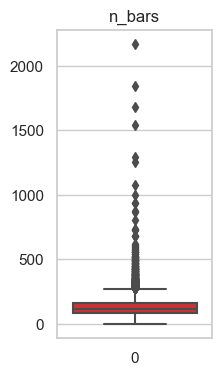

In [39]:
plt.figure(figsize=(2, 4))
sns.boxplot(data=training_set['n_bars'], palette="Set1")
plt.title("n_bars")

Text(0.5, 1.0, 'n_beats')

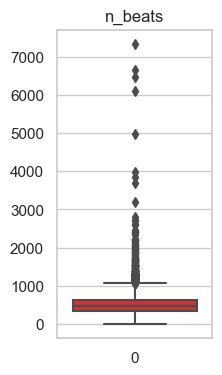

In [40]:
plt.figure(figsize=(2, 4))
sns.boxplot(data=training_set['n_beats'], palette="Set1")
plt.title(f"n_beats")

Text(0.5, 1.0, 'speechiness')

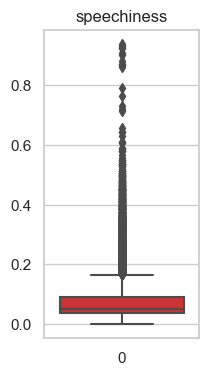

In [43]:
plt.figure(figsize=(2, 4))
sns.boxplot(data=training_set['speechiness'], palette="Set1")
plt.title(f"speechiness")

Text(0.5, 1.0, 'liveness')

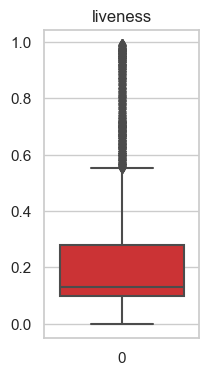

In [46]:
plt.figure(figsize=(2, 4))
sns.boxplot(data=training_set['liveness'], palette="Set1")
plt.title(f"liveness")

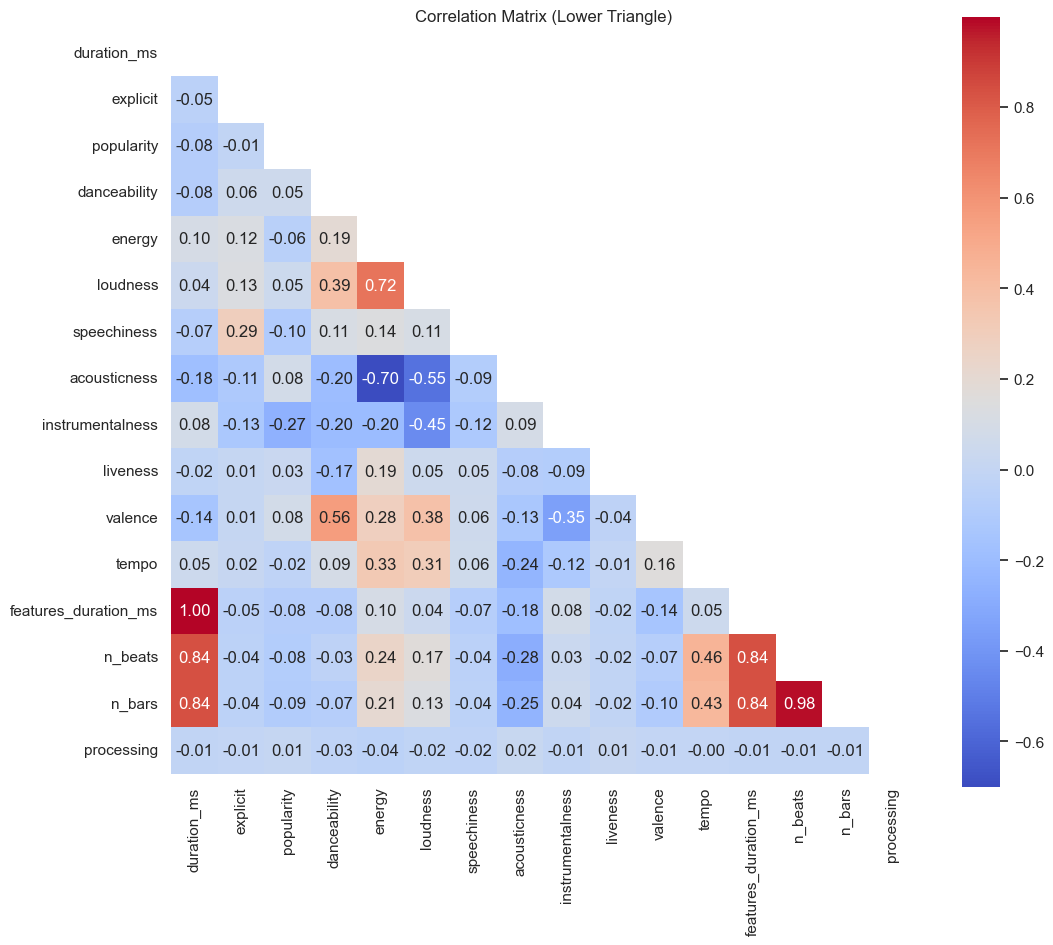

In [47]:
variables_for_correlation = ['duration_ms', 'explicit', 'popularity', 'danceability', 'energy', 'loudness',
                             'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                             'tempo', 'features_duration_ms', 'n_beats', 'n_bars', 'processing']

# Extract the correlation matrix
correlation_matrix = training_set[variables_for_correlation].corr()

# Set up a mask to hide the upper triangular part (including the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the style for the heatmap (optional)
sns.set(style="white")

# Create a correlation matrix heatmap with Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, mask=mask, fmt=".2f", square=True)

# Set plot title
plt.title("Correlation Matrix (Lower Triangle)")

# Show the plot
plt.show()